In [1]:
# STEP 1: IMPORT THE PACKAGES

import numpy as np
import pandas as pd

In [2]:
# STEP 2: LOAD DATA WHILE ASSIGNING -1 AS NULL VALUES

train = pd.read_csv('/Users/sanket/Downloads/train_final.csv',na_values=-1)
print('train.csv number of rows and columns:',train.shape)

train.csv number of rows and columns: (43388, 31)


The target variable is "target", which is 1 if a claim was filed, and 0 otherwise. Also, the variables ending with "cat" are categorical, and those ending with "bin" are binary as per Kaggle website.

In [3]:
# STEP 3: SEPARATE TARGET AND FEATUES VARIABLES

features = train.drop(['target'], axis=1).values
targets = train.target.values

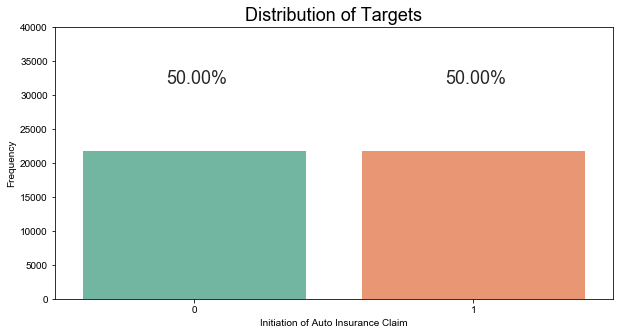

1    21694
0    21694
Name: target, dtype: int64

In [4]:
# STEP 4: EXPLORE “target” VARIABLE
import seaborn as sns
import matplotlib.pyplot as plt

targets = train.target.values
ax = sns.countplot(x = targets ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=40000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(targets)), (p.get_x()+ 0.3, p.get_height()+10000))
plt.title('Distribution of Targets')
plt.xlabel('Initiation of Auto Insurance Claim')
plt.ylabel('Frequency')
plt.show()
train['target'].value_counts()

In [5]:
# STEP 5: SHOW NUMBER OF UNIQUE DATA TYPES

train.dtypes.value_counts()

int64      16
float64    15
dtype: int64

In [6]:
# STEP 6: FEATURE GROUPING INTO CATEGORICAL, BINARY, ORDINAL, AND ORDINAL DATA TYPES
# STEP 6a: Categorical (cat) and Binary (bin) Features based on information provided by kaggle

cat_cols = [col for col in train.columns if '_cat' in col]
bin_cols = [col for col in train.columns if '_bin' in col]

In [7]:
# STEP 6b: Ordinal (ord) and Continuous (con) Features based on Data Analysis (this was not provided by kaggle)
# STEP 6b.1: Find no. of unique values

def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train)


 Unique value of "id" is "43388" 

 Unique value of "target" is "2" 

 Unique value of "ps_ind_01" is "8" 

 Unique value of "ps_ind_02_cat" is "4" 

 Unique value of "ps_ind_03" is "12" 

 Unique value of "ps_ind_04_cat" is "2" 

 Unique value of "ps_ind_05_cat" is "7" 

 Unique value of "ps_ind_06_bin" is "2" 

 Unique value of "ps_ind_07_bin" is "2" 

 Unique value of "ps_ind_08_bin" is "2" 

 Unique value of "ps_ind_09_bin" is "2" 

 Unique value of "ps_ind_15" is "14" 

 Unique value of "ps_ind_16_bin" is "2" 

 Unique value of "ps_ind_17_bin" is "2" 

 Unique value of "ps_ind_18_bin" is "2" 

 Unique value of "ps_reg_01" is "10" 

 Unique value of "ps_reg_02" is "19" 

 Unique value of "ps_reg_03" is "4184" 

 Unique value of "ps_car_01_cat" is "12" 

 Unique value of "ps_car_02_cat" is "2" 

 Unique value of "ps_car_04_cat" is "10" 

 Unique value of "ps_car_06_cat" is "18" 

 Unique value of "ps_car_07_cat" is "2" 

 Unique value of "ps_car_08_cat" is "2" 

 Unique value of "p

In [8]:
# STEP 6b.2: Convert variables into category type, and then derive nominal and continuous features
# The unique value of "ps_car_11_cat" is maximum in the data set and is equal to 104

def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')

category_type(train)

tot_cat_col = list(train.select_dtypes(include=['category']).columns)
ord_cols = [n for n in tot_cat_col if n not in cat_cols + bin_cols +['target']]
con_cols = [c for c in train if c not in cat_cols + bin_cols + ord_cols + ['target']]

train.dtypes.value_counts()

category    26
float64      4
int64        1
dtype: int64

In [9]:
# STEP 6c: Final Feature rgouping

print(len(cat_cols), ' cat_cols:', cat_cols)
print('---------')
print(len(bin_cols), ' bin_cols:', bin_cols)
print('---------')
print(len(ord_cols), ' ord_cols:', ord_cols)
print('---------')
print(len(con_cols), ' con_cols:', con_cols)

11  cat_cols: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_11_cat']
---------
7  bin_cols: ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
---------
7  ord_cols: ['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_11', 'ps_car_15']
---------
5  con_cols: ['id', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']


In [10]:
# STEP 7: CCHECK FOR MISSING VALUES, IF ANY

cols_missing_val_train_after = train.columns[train.isnull().any()].tolist()
cols_missing_val_train_after

[]

In [11]:
# STEP 8: DETERMINE OUTLIERS IN CONTINUOUS FEATURES

def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(train,con_cols)


id -745237.5 2228954.5 15221.61 1473965.57
ps_reg_03 0.12925387485 1.60910116645 0.4272001873 1.8867962264
ps_car_12 0.15417331195 0.58631852275 0.3155946768 0.5744562647
ps_car_13 0.3014015283 1.3268429835 0.456540164648 1.67824297075


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ps_car_14 0.2805456883 0.4676600083 0.2887905816 0.5329165038


In [12]:
# STEP 9: SPLIT DATA SET INTO TRAIN AND TEST

from sklearn.model_selection import train_test_split

#feat = [c for c in train.columns.values if c not in ['target']]
#x_train, x_test, y_train, y_test = train_test_split(train, train['target'], test_size=0.30, random_state=42)

feat = [c for c in train.columns.values if c not in ['id', 'target']]
x_train, x_test, y_train, y_test = train_test_split(train[feat], train['target'], test_size=0.30, random_state=42)

print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (30371, 29)
x_test: (13017, 29)


In [13]:
# STEP 10: GRADIENT BOOSTING CLASSIFIER
# STEP 10a: Gradient Boosting Classifier Model Building

from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 500, max_depth = 9, min_samples_split = 2, min_samples_leaf = 2, max_features = 10, random_state=123)
GB.fit(x_train, y_train)
print (GB)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=9,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)


In [14]:
# STEP 10b: Gradient Boosting Classifier Prediction and Performance

from sklearn.metrics import f1_score

pred = GB.predict(x_test)
cf_gb = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
f1 = f1_score(y_test, pred, pos_label=1)
acc = GB.score(x_test, y_test)

print('GB Confusion Matrix:')
print (cf_gb)
print('-----------------------------------------')
print('GB Accuracy: ',acc*100,'%')
print('-------------------------')
print('GB f1 score: ',f1*100,'%')

GB Confusion Matrix:
Predicted     0     1
Actual               
0          3935  2591
1          2799  3692
-----------------------------------------
GB Accuracy:  58.5926096643 %
-------------------------
GB f1 score:  57.8049162361 %


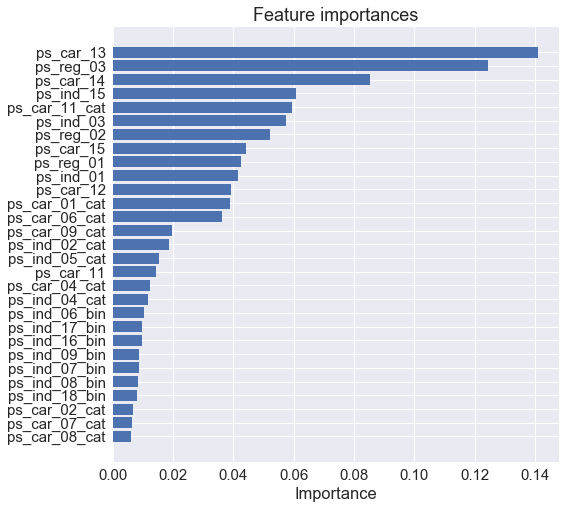

In [15]:
# STEP 10c: Gradient Boosting Classifier - Feature's Importance

from sklearn.metrics import f1_score

features_list = x_train.columns.values
feature_importance = GB.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()